# Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy import misc

# Get image and Visualize

In [2]:
img = misc.ascent()
img

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [3]:
len(img), img.shape, img.ndim

(512, (512, 512), 2)

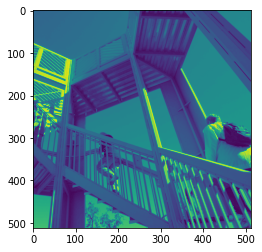

In [4]:
plt.imshow(img)

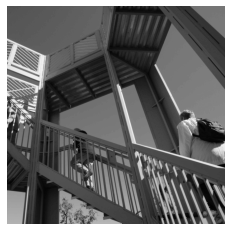

In [5]:
plt.grid(False)
plt.axis('off')
plt.gray()
plt.imshow(img)

# Transformed image

In [6]:
transformed_img = np.copy(img)
transformed_img

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [7]:
size_x = transformed_img.shape[0]
size_y = transformed_img.shape[1]
size_x, size_y

(512, 512)

# Create 3X3 filters

* Detects Edges

In [8]:
filter1 = [[0, 1, 0],
           [1, -4, 1],
           [0, 1, 0]]

filter2 = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

filter3 = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]

WEIGHT = 1

# Perform Convolution

In [9]:
filter1[0][0]

0

In [11]:
img[0,0]

83

In [19]:
def image_convolution(img, filter, weight=1):
  transformed_img = np.copy(img)
  size_x = transformed_img.shape[0]
  size_y = transformed_img.shape[1]
  
  for x in range(1, size_x-1):
    for y in range(1, size_y-1):
      convolution = 0.0

      convolution = convolution + (img[x-1, y-1] * filter[0][0])
      convolution = convolution + (img[x, y-1] * filter[0][1])
      convolution = convolution + (img[x+1, y-1] * filter[0][2])

      convolution = convolution + (img[x-1, y] * filter[1][0])
      convolution = convolution + (img[x, y] * filter[1][1])
      convolution = convolution + (img[x+1, y] * filter[1][2])

      convolution = convolution + (img[x-1, y+1] * filter[2][0])
      convolution = convolution + (img[x, y+1] * filter[2][1])
      convolution = convolution + (img[x+1, y+1] * filter[2][2])

      convolution = convolution * weight

      if (convolution < 0):
        convolution = 0
      if (convolution > 255):
        convolution = 255
      transformed_img[x, y] = convolution

  return transformed_img

In [20]:
def plot_image(img):
  plt.grid(False)
  plt.axis('off')
  plt.gray()
  plt.imshow(img)

In [21]:
transformed_img1 = image_convolution(img, filter1)
transformed_img2 = image_convolution(img, filter2)
transformed_img3 = image_convolution(img, filter3)

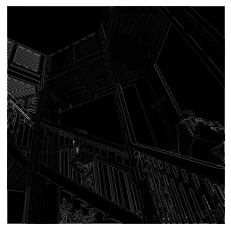

In [22]:
plot_image(transformed_img1)

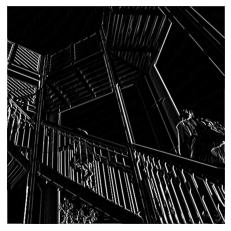

In [23]:
plot_image(transformed_img2)

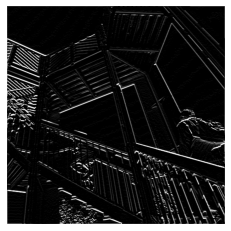

In [24]:
plot_image(transformed_img3)

# Perform Pooling on image

* pooling (2, 2)

In [25]:
def image_pooling(img):
  transformed_img = np.copy(img)
  size_x = transformed_img.shape[0]
  size_y = transformed_img.shape[1]

  new_x = int(size_x / 2)
  new_y = int(size_y / 2)
  new_image = np.zeros((new_x, new_y))

  for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
      pixels = []
      pixels.append(transformed_img[x, y])
      pixels.append(transformed_img[x+1, y])
      pixels.append(transformed_img[x, y+1])
      pixels.append(transformed_img[x+1, y+1])
      new_image[int(x/2), int(y/2)] = max(pixels)
  
  return new_image

In [26]:
pooled_img1 = image_pooling(transformed_img1)

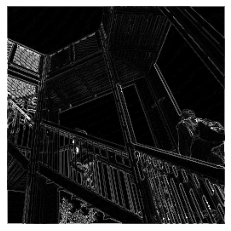

In [27]:
plot_image(pooled_img1)

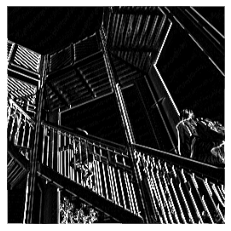

In [28]:
pooled_img2 = image_pooling(transformed_img2)
plot_image(pooled_img2)

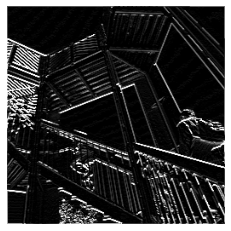

In [30]:
pooled_img3 = image_pooling(transformed_img3)
plot_image(pooled_img3)